<h1>ISAT 449 - Emerging Topics in Applied Data Science</h1>
<h2>TensorFlow 2.x : Lab 1: Linear Regression Model</h2>
<h3>Objectives</h3>
<ul>
  <li>Gain more familararity with TensorFlow 2.x</li>
  <li>Build a simple machine learning model with a self-defined loss function</li>
  <li>Selecting a suitable optimization function (algorithm)</li>
  <li>Explicitly train the model using a training for-loop</li>
  <li>Plot the model's loss per epoch</li>
  <li>Improve the model's performance</li>
  <li>Plot the model's loss per epoch after improvements</li>
</ul>
<h3>Two ways to get started with TensorFlow</h3>
<p>We will use Colab for this and the remainig labs. This is the *quickest way to get started with no overhread to you. You just need a browser and a Google account!<br>
(1) Go to Google Colab (https://colab.research.google.com/)<br>
(2) Create an account and log in<br>
(3) Theres a tab menu with.. 1. 1. Examples 1. 1. Recent 1. 1. Google Drive 1.1. etc.<br>
(4) Click the link to create a new Notebook and your're ready!<br>
</p>
<h3>OR
<br>
Install TensorFlow 2.x in a Jupter Notebook (Anaconda Data Science Framework)
</h3>
<p>This method requires that you manually install TensorFlow 2.x. We reccomend that if you use this method, that you download and install the Ananconda Distribution
(https://www.anaconda.com/distribution/) for your particular OS. While there is some overhead, the installation should be smooth and problem free, especially if yor use the anaconda
navigator (https://docs.anaconda.com/anaconda/navigator/). Once installed, you may want to create a separate environemnt for tensorflow and upgrade it to the version we are using
for this class. This will have to be a manuual upgrade using pip. For your convenience, the pip command are given below.</p>
<br>
<h3>Quick Start</h3>
<p>We will assume your are in Google Colab for these labs although everything we do can be done from within any properly configured TensorFlow environment</p>
<h4>Let's import tensorflow and some helper modules</h4>

In [ ]:
#now import numpy and new tensorflow version
import numpy as np
import tensorflow as tf
print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.6.0


<h4>Creating variables and constants</h4>
<p>In this lesson, we will study a simple linear realtionship with one variable, the point-slope straight line formula:</p>
$$y(x)=mx+b$$
<p>We will create a tensorflow variable and constant initalize them values of 4.0 and 2.0. I named them slope and intercept but this is optional. Note what happens when we print them</p>

In [ ]:
m = tf.Variable(4.0, name='slope')
b = tf.Variable(2.0, name='intercept')
print(m)
print(b)


<tf.Variable 'slope:0' shape=() dtype=float32, numpy=4.0>
<tf.Variable 'intercept:0' shape=() dtype=float32, numpy=2.0>


<h5>Retriving values of variables</h5>
<p>To actually get the numerical values, you have to numpy()as below:</p>

In [ ]:
print(m.numpy())
print(b.numpy())

4.0
2.0


<h4>Optimization</h4>
<p>In this section we are going to create a function (linear) that we want to use as our model to optimize to fit some data. This is a simple linear regression model y(x) = f(x) = mx and we
want to find the best slope (m) that fits our data which in this case is going to be a single data point!</p>
<h3>Definitions</h3>
<p>loss and optimizer functions</p>
<p>Before training, the model has to be compiled. When compiled for training, the model is given</p>
<ul>
  <li>Loss Function - A way of measuring how far off predictions are from the desired outcome.</li>
  <li>Optimizer Function - A way of adjusting internal values in order to reduce the loss</li>
</ul>
<br>
<h4>Define the model with a function</h4>

In [ ]:
#simply f(x) = mx + b
def f(x):
  return (m*x +b)

<p>Now let's test our function with some arbitrary data: x=3.0</p>
<br>
<p><b>A simple way to have tensorflow calculate it internally is just to use the print function</b></p>

In [ ]:
#print function (pass it numeric 3.0) and note that is it a tensor.
# it would return 14.0 since we made m=4.0 and b=2.0
print(f(3))

tf.Tensor(14.0, shape=(), dtype=float32)


<h4>Create a simple loss function that we will later optimize</h4>
<ol>
  <li>Note: In TensorFlow 2.x, the loss must be a function so we will create an anonymous lambda function here</li>
  <li>Our loss funtion will be: abs((f(4) - 8)). This is to be interpreted as saying:</li>
</ol>
<ul>
  <li>make y(4) as close to the number 8 by adjusting the value for the variable m (which we initially set equal to 4) i.e., 4 times what? + 2 = 8? ans: m=1.5. so we expect that the
algorithm will adjust the slope unitl it reaches the value of 1.5.
  </li>
  <li>NOTE: The TensorFlow constant(the intercept does not change!)</li>
</ul>

In [ ]:
#loss function
loss = lambda:abs(f(4) - 8)
#loss=lambda:tf.square(f(4)-8)
loss()

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

<h4>Pick an optimizer</h4>
<p>Google's TensorFlow Library has a number of optimizers. For this exercise we will use a from of Gradient Descent (https://developers.google.com/machinelearning/glossary/#gradient_descent) called Stochastic Gradient Descent (https://developers.google.com/machine-learning/glossary/#s).
</p>

In [ ]:
optimizer = tf.optimizers.SGD(learning_rate = .001)


<p><b>Now let's run our model for a few iterations (epochs) using the selcted optimizer and our created loss function</b></p>

In [ ]:
loss_values=[]
epochs=[]
for epoch in range(1000):
  epochs.append(epoch)
  loss_values.append(loss().numpy())
  optimizer.minimize(loss, var_list=[m])
  if epoch%50==0:
    print('m = {0:.4f} and the constant b = {1} while f(4)= {2:.4f} and loss={3:0.2f}'.format(m.numpy(), b.numpy(), f(4), loss().numpy()))

m = 3.9960 and the constant b = 2.0 while f(4)= 17.9840 and loss=9.98
m = 3.7960 and the constant b = 2.0 while f(4)= 17.1840 and loss=9.18
m = 3.5960 and the constant b = 2.0 while f(4)= 16.3840 and loss=8.38
m = 3.3960 and the constant b = 2.0 while f(4)= 15.5840 and loss=7.58
m = 3.1960 and the constant b = 2.0 while f(4)= 14.7840 and loss=6.78
m = 2.9960 and the constant b = 2.0 while f(4)= 13.9841 and loss=5.98
m = 2.7960 and the constant b = 2.0 while f(4)= 13.1841 and loss=5.18
m = 2.5960 and the constant b = 2.0 while f(4)= 12.3841 and loss=4.38
m = 2.3960 and the constant b = 2.0 while f(4)= 11.5841 and loss=3.58
m = 2.1960 and the constant b = 2.0 while f(4)= 10.7841 and loss=2.78
m = 1.9960 and the constant b = 2.0 while f(4)= 9.9841 and loss=1.98
m = 1.7960 and the constant b = 2.0 while f(4)= 9.1841 and loss=1.18
m = 1.5960 and the constant b = 2.0 while f(4)= 8.3841 and loss=0.38
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0001 and loss=0.00
m = 1.5000 and the const

<h4>Convergence of model</h4>
<p>You will note that the model has coverged to the expected value of the slope (m) after 13 epochs with the above loss function and optimizer (note that I only display
output every 50 epochs). Congratulations! You have just built and trained your first machine learning model with TensorFlow 2.x!
</p>
<br>
<h4>Exercise 1</h4>
<p>Plot the loss per epoch from the above model</p>

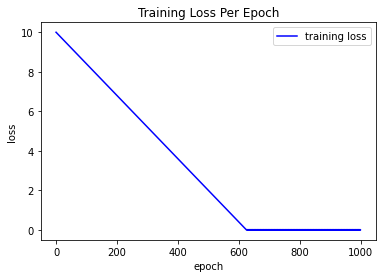

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
plt.plot(loss_values, color="blue", label = "training loss")
plt.xlabel("epoch")
plt.ylabel("loss")
#Legend
plt.legend(loc='upper right')
#Title
plt.title("Training Loss Per Epoch")
#Show plot
plt.show()

<h4>Exercise 2</h4>
<ul><li>Create a better loss function than the current one used in the model using built-in tensorflow math functions (use the same value for for the input, i.e. x=4). Display the loss along
with the the other values already being shown during training.
</li></ul>

In [ ]:
cooler_loss=lambda:(tf.square(f(4)-8))

#Print Loss per thing
cooler_loss_values=[]
epochs=[]
for epoch in range(1000):
  epochs.append(epoch)
  cooler_loss_values.append(cooler_loss().numpy())
  optimizer.minimize(cooler_loss, var_list=[m])
  if epoch%50==0:
    print('m = {0:.4f} and the constant b = {1} while f(4)= {2:.4f} and loss={3:0.2f}'.format(m.numpy(), b.numpy(), f(4), loss().numpy()))



m = 1.4962 and the constant b = 2.0 while f(4)= 7.9846 and loss=0.02
m = 1.4992 and the constant b = 2.0 while f(4)= 7.9970 and loss=0.00
m = 1.4999 and the constant b = 2.0 while f(4)= 7.9994 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 7.9999 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.0 while f(4)= 8.0000 and loss=0.00
m = 1.5000 and the constant b = 2.

<h4>Exercise 3</h4>
<p>Plot the loss per epoch from your improved model</p>

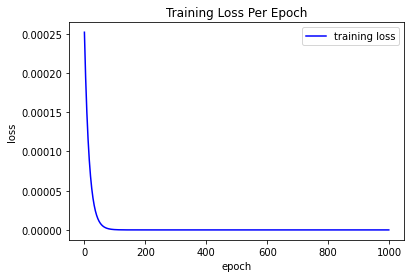

In [ ]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
plt.plot(cooler_loss_values, color="blue", label = "training loss")
plt.xlabel("epoch")
plt.ylabel("loss")
#Legend
plt.legend(loc='upper right')
#Title
plt.title("Training Loss Per Epoch")
#Show plot
plt.show()